In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import heartpy as hp
from pre_processing import filter_signal, pre_process

In [39]:
df_X_train = pd.read_csv("data/X_train.csv", index_col="id")
df_Y_train = pd.read_csv("data/Y_train.csv", index_col="id")

In [65]:
id = 342
signal = df_X_train.iloc[id,:].dropna()
freq = 300.0 #Hz
filter_bandwidth = [3, 45]

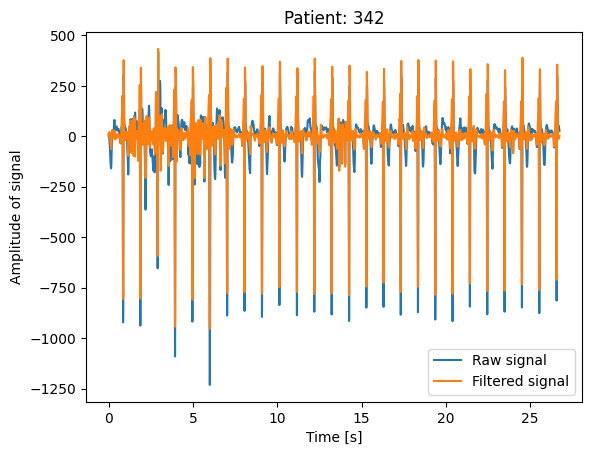

In [66]:
sig_flt= filter_signal(signal=signal,
                          bandwidth=filter_bandwidth,
                          freq=freq)

plt.plot(np.arange(len(signal))/freq, signal, label = "Raw signal")
plt.plot(np.arange(len(sig_flt))/freq, sig_flt, label = "Filtered signal")
plt.title(f'Patient: {id}')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude of signal')
plt.legend()
plt.show()

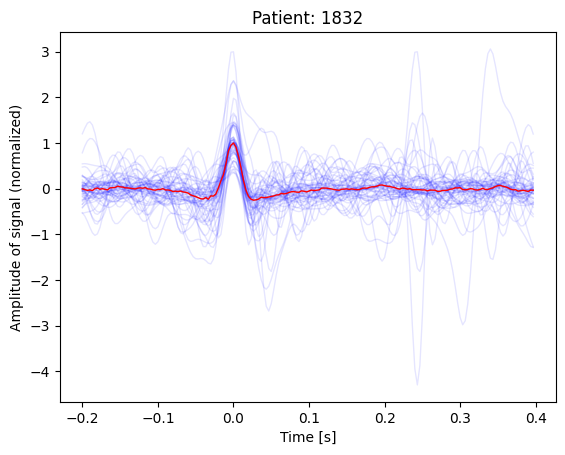

In [94]:
ts, signal, signal_flt, rpeaks, templates_ts, templates = pre_process(signal=signal, freq=freq)

for i in range(len(templates)):
    plt.plot(templates_ts, templates[i], 'b', alpha=0.1, lw=1)
plt.plot(templates_ts, np.median(templates, axis=0), 'r', alpha=1, lw=1)

plt.title(f'Patient: {id}')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude of signal (normalized)')
plt.show()

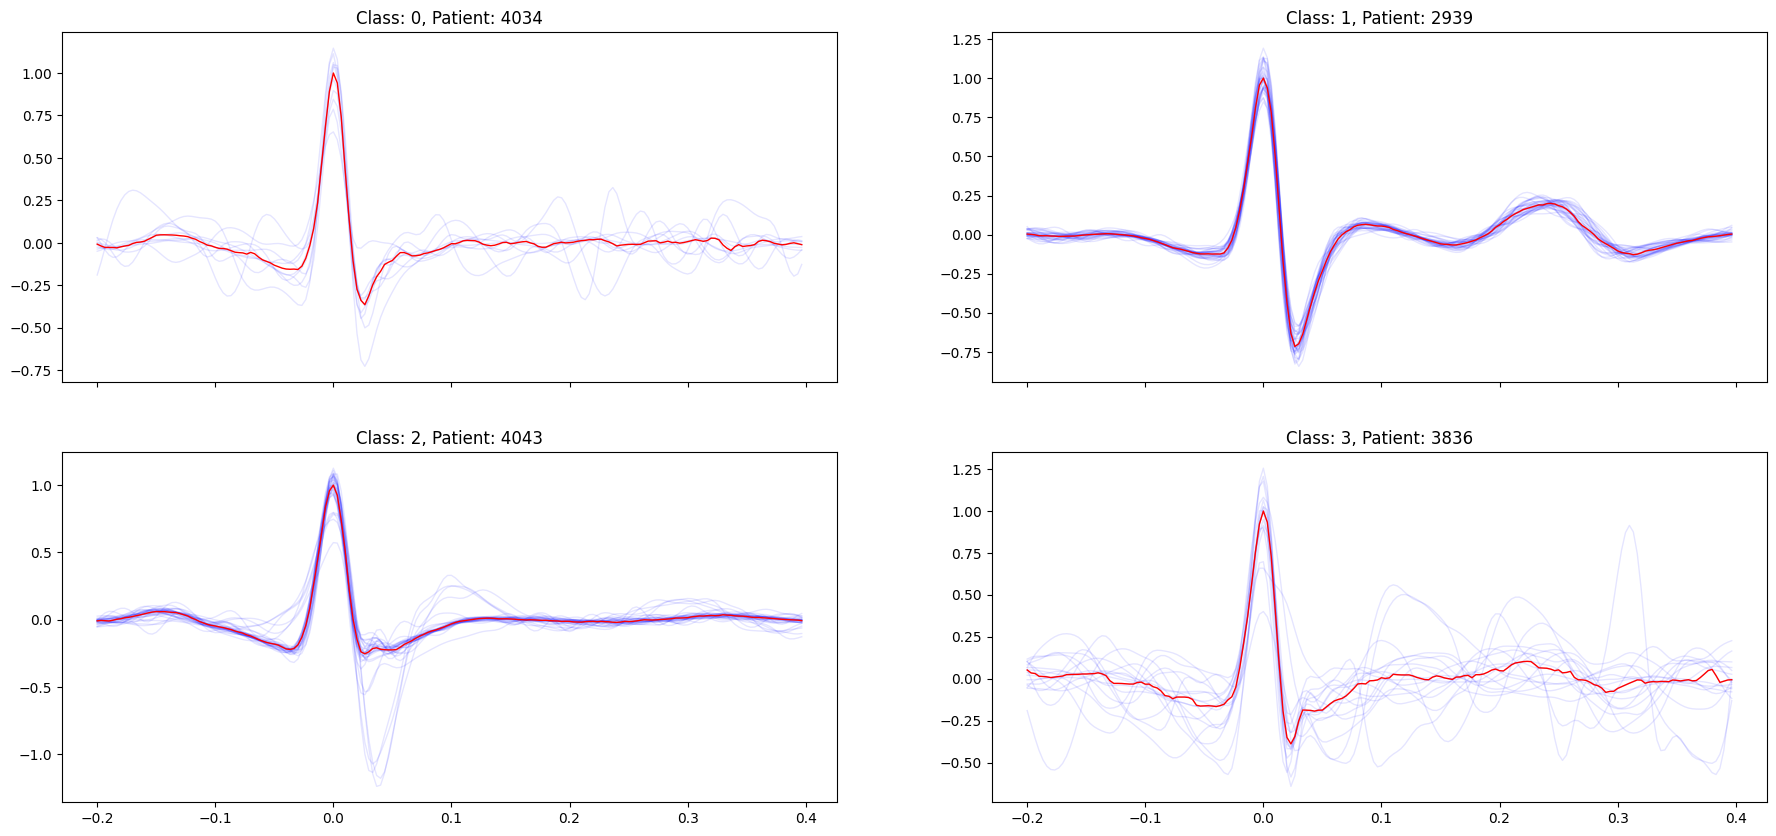

In [96]:
fig, axs = plt.subplots(2, 2, sharey=False, sharex=True, figsize=(22,10))
for i in range(4):
    id = np.random.choice(df_Y_train[df_Y_train["y"]==i].index)
    signal = df_X_train.iloc[id,:].dropna()
    ts, signal, signal_flt, rpeaks, templates_ts, templates = pre_process(signal=signal, freq=freq)

    for k in range(len(templates)):
        axs[i//2,i%2].plot(templates_ts, templates[k], 'b', alpha=0.1, lw=1)
    axs[i//2,i%2].plot(templates_ts, np.median(templates, axis=0), 'r', alpha=1, lw=1)
    axs[i//2,i%2].set_title(f'Class: {i}, Patient: {id}')
plt.show()


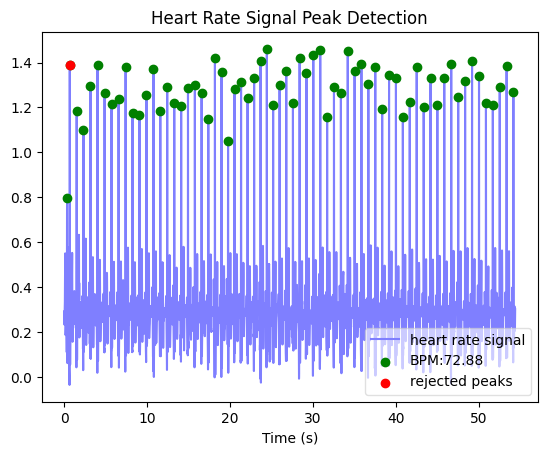

In [61]:
working_data, measures = hp.process(signal_flt, 300.0)
hp.plotter(working_data, measures)